<a href="https://colab.research.google.com/github/jinyingtld/python/blob/main/AI6126_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import torchvision

from torch import nn

# Convolutional layer in PyTorch 

## Conv2d
CLASS torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0,dilation=1, groups=1,bias=True,padding_mode='zeros'

Applies a 2D convolution over an input signal composed of several input planes.

In the simplest case, the output value of the layer with input size (N, Cin,H,W) and output (N, Cout,Hout,Wout) can be precisely described as:

>out($N_{i},C_{out_{j}})=bias(C_{out_{j}}+\sum^{C_{in} -1}_{k=0}weight(C_{out_{j}},k)*input(N_{i},k)$ 

where * is the valid 2D ccross-correlation operator, N is a batch size, C denotes a number of channels, H is a height of input planes in pixels, and W is width in pixels.

* ***stride*** control the stride for the cross-correlation,a single number or a tuple.
* ***padding*** controls the amount of implicit zero-paddings on both sides for padding number of points for each dimension.
* ***dilation*** controls the spacing between the kernel points; also known as the a trous algorithm, it is harder to describe, but this link has a nice visualization of what dilation does. 
* ***groups*** controls the connections between inputs and outputs. in_channels and out_channels must both be divisible by groups. For example, 
    >- At groups=1, all inputs are convolved to all outputs 
    >- At groups=2, the operation becomes equivalent to having two conv layers side by side, each seeing half the input channels,and producing half the output channels,and both subsequently concatenated
    >- At groups=in_channels, each input channel is convolved with its own set of filters, of size:[$\frac{out\\_channel}{in\\_channel}$]

The parameters ***kernel_size***,***stride***,***padding***,***dilation**** can either be:
    
        * a single int - in which case the same value is used for the height and width dimension
        * a tuple of two ints - in which case, the first int is used for the height dimension, and the second int for the width dimension
            

In [19]:
# ?nn.Conv2d

# with square kernels and equal stride
m = nn.Conv2d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding 
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2)) 
# non-square kernels and unequall stride and with padding and dilation 
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1)) # dilation result will 
# controls output size
input = torch.randn(20, 16, 50, 100)  # 20: N 16:Cin 50:H 100:W
print(input.size())
output = m(input)
print(output.size())

torch.Size([20, 16, 50, 100])
torch.Size([20, 33, 28, 100])


In [11]:
# ?torch.randn

# MaxPool2d

CLASS torch.nn.MaxPool2d(kernel_size,stride=None,padding=0,dilation=1,return_indices=False,ceil_mode=False)

Applies a 2D max pooling over an input signal composed of several input planes.

In the samplest case, the output value of the layer with input size (N,C,H,W), output(N,C,Hout,Wout) and kernel_size(kH,kW) can be precisely describbed as:
>out($N_{i},C_{out_{j}})=max_{m=0,...,kH-1}max_{n=0,...,kW-1}input(N_{i},C_{j},stride[0]\\X\space h+m,stride[1]\\X \space w+n$

If padding is non-zero, then the input is implicitly zero-padded on both sides for padding number of points. dilation controls the spacing between the kernel points. It is harder to describe, but this link has a nice visualization of what dilation does. 

The parameters kernel_size, stride, padding, dilation can either be:

        * a single int - in which case the same value is used for the height and width dimension
        * a tuple of two ints - in which case, the first int is used for the height dimension, and the second int for the width dimension

In [23]:
# pool of square window of size=3, stride=2
m = nn.MaxPool2d(3, stride=2)
# pool of non-square window
m = nn.MaxPool2d((3, 2), stride=(2, 1))
input = torch.randn(20, 16, 50, 32)
print(input.size())
output = m(input)
print(output.size())

torch.Size([20, 16, 50, 32])
torch.Size([20, 16, 24, 31])


# AvgPool2d

CLASS torch.nn.AvgPool2d(kernel_size,stride=None,padding=0,ceil_mode=False,count_include_pad=True,divisor_override=None)

Applies a 2D average pooling over an input signal composed of several input planes.

In the samplest case, the output value of the layer with input size (N,C,H,W), output(N,C,Hout,Wout) and kernel_size(kH,kW) can be precisely describbed as:
>out($N_{i},C_{out_{j}})=\frac{1}{kH * kW}\sum^{kH-1}_{m=0}\sum^{kW-1}_{n=0}input(N_{i},C_{j},stride[0]\\X\space h+m,stride[1]\\X \space w+n$

If padding is non-zero, then the input is implicitly zero-padded on both sides for padding number of points. 

The parameters kernel_size, stride, padding, dilation can either be:

        * a single int - in which case the same value is used for the height and width dimension
        * a tuple of two ints - in which case, the first int is used for the height dimension, and the second int for the width dimension

In [24]:
# pool of square window of size=3, stride=2
m = nn.AvgPool2d(3, stride=2)
# pool of non-square window
m = nn.AvgPool2d((3, 2), stride=(2, 1))
input = torch.randn(20, 16, 50, 32)
print(input.size())
output = m(input)
print(output.size())

torch.Size([20, 16, 50, 32])
torch.Size([20, 16, 24, 31])


# Linear 
CLASS torch.nn.Linear(in_features,out_features,bias=True)

Applies a linear transformation to the incoming data: $y=xA^{T}+b$

>Parameteres
>- in_features - size of each input sample
>- out_features - size of each output sample
>- bias - If set to False, the layer will not learn an additive bias. Default: True

>Shape:
>- Input:$(N,*,H_{in})$ where * means any number of additional dimensions and $H_{in}=in\_features$
>- Output:$(N,*,H_{out})$ where all but the last dimension are the same shape as the input and $H_{out}=out\_features$

>Variables
>- ***~Linear.weight*** - the learnable weights of the module of shape(out_features, in_features). The values are initialized from $u(-\sqrt{k},\sqrt{k})$,where $k = \frac{1}{in\_features}$

>- ***~Linear.bias*** - the leanable bias of the module of shape(out_features). if bias is True, the values are initialized from $u(-\sqrt{k},\sqrt{k})$,where $k = \frac{1}{in\_features}$


In [29]:
# padding.ipynb
# Install PyTorch and Torchvision

# !pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

torch.__version__

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision 
import torchvision.transforms as transforms 



In [30]:
m = nn.ZeroPad2d(2)

In [31]:
input = torch.randn(1,1,3,3)

In [32]:
input

tensor([[[[-1.2302,  0.2768,  1.7490],
          [-0.3340, -0.1988, -0.1093],
          [-0.3426, -0.0642, -0.5851]]]])

In [33]:
m(input)

tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000, -1.2302,  0.2768,  1.7490,  0.0000,  0.0000],
          [ 0.0000,  0.0000, -0.3340, -0.1988, -0.1093,  0.0000,  0.0000],
          [ 0.0000,  0.0000, -0.3426, -0.0642, -0.5851,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]]])

# MNIST with PyTorch 
In this notebook example, we will walk through how to train a simple CNN to classify MNIST images. 

We will rely on the following modules,including torch and torchvision.

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
# !pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

In [36]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt 


# 1. Data Loader 
The first step is to create a data loader.
A data loader can be treated as a list (or iterator, technically). Each time it will provide a minibatch of (img, label) pairs.

In [53]:
# Choose a dataset -- MNIST for example
train_set = datasets.MNIST(root='./data', train=True,download=True)
test_set = datasets.MNIST(root='./data', train=False,download=True)

train_set.transform = transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.1307,),(0.3081,))                    
                    ])

test_set.transform = transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.1307,), (0.3081,))                               
                    ])

# Create a data loader #batch_size=64 mean each batch got 64 samples
train_loader = DataLoader(train_set,batch_size=64, shuffle=True)
test_loader = DataLoader(test_set,batch_size=64, shuffle=False)

In [49]:
!ls -l ./data/MNIST/raw
# ?transforms.Compose
# ??transforms.Normalize

total 65008
-rw-r--r-- 1 root root  7840016 Jan 31 06:58 t10k-images-idx3-ubyte
-rw-r--r-- 1 root root  1648877 Jan 31 06:58 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    10008 Jan 31 06:58 t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root     4542 Jan 31 06:58 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 47040016 Jan 31 06:58 train-images-idx3-ubyte
-rw-r--r-- 1 root root  9912422 Jan 31 06:58 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    60008 Jan 31 06:58 train-labels-idx1-ubyte
-rw-r--r-- 1 root root    28881 Jan 31 06:58 train-labels-idx1-ubyte.gz


Let us show some of the training images, for fun.

torch.Size([64, 1, 28, 28])


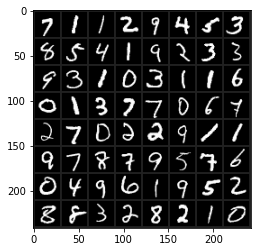

Gt	: 7 1 1 2 9 4 5 3 8 5 4 1 9 2 3 3 9 3 1 0 3 1 1 6 0 1 3 7 7 0 6 7 2 7 0 2 2 9 1 1 9 7 8 7 9 5 7 6 0 4 9 6 1 9 5 2 8 8 3 2 8 2 1 0


In [56]:
def imshow(img, mean=0, std=1):
    img = img * std + mean # unnormalize 
    npimg = img.numpy().transpose(1, 2, 0).squeeze() # c(c, h, w) -> (h, w, c)
    plt.imshow(npimg)
    plt.show()

trainiter = iter(train_loader)
img, label = trainiter.next()
print(img.shape) # (n,c,h,w)

# Visualization 
img = torchvision.utils.make_grid(img)
imshow(img, 0.1307, 0.3081)
print('Gt\t:', ' '.join('%d' % label[j].item() for j in range(len(label))))

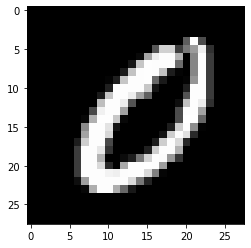

In [59]:
# To check a single random image

trainiter = iter(train_loader)
img, label = trainiter.next()
plt.imshow(img[0].reshape(28,28), cmap="gray")

# 2. Model 
The second step is to define our model.

We will use a simple CNN with conv(5X5) -> relu -> pool(2x2) -> conv(5X5) -> relu -> pool(2x2) ->fc(200) -> relu -> fc(10).

In PyTorch, a model is defined by a subclass of nn.Module. It has two methods: 
>- \__init__:constructor. Create layers here. Note that we don't define the connections between layers in this function.
>- forward(x): forward function. Receives an input variable x. Returns a output variable. Note that we actually connect the layers here dynamically.

We no longer need to implement the backward function. The computational graph will be built implicitly based on the forward operations, and the gradients can be automatically computed. 


In [60]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__() # Call parent class's constructor 
        self.conv1 = nn.Conv2d(1, 10, 5, 1) # (in_channel, out_channel,kernel_size,stride)
        self.conv2 = nn.Conv2d(10, 20, 5, 1) # (in_channel, out_channel,kenel_size,stride)
        self.pool = nn.MaxPool2d(2) # kernel_size=2
        self.fc1 = nn.Linear(4*4*20, 200) # in_features, out_features
        self.fc2 = nn.Linear(200, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.conv1(x) # Hout=(28-5)/1 +1 = 24, Hout X Wout = 24 * 24 Cout=10
        x = self.relu(x)
        x = self.pool(x) # (24-2)/2 + 1 = 12 , Hout*Wout = 12*12 Cout=10
        x = self.conv2(x) # (12-5)/1 + 1 = 8  Hout*Wout = 8*8 Cout=20
        x = self.relu(x)
        x = self.pool(x) # (8-2)/2 + 1 = 4 , Hout*Wout = 4*4 Cout=20
        x = x.view(-1, 4*4*20) # Flatten the data
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model  = SimpleCNN()

You can double check your model specification. 

In [62]:
# print(model)



SimpleCNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=320, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=10, bias=True)
  (relu): ReLU()
)


Let us test with random inputs.

In [66]:
x = torch.rand([64, 1, 28, 28])
x.shape

torch.Size([64, 1, 28, 28])

In [65]:
y = model(x)
print(y.shape)

torch.Size([64, 10])


# 3. Loss and Optimizer 
The third step is to define the loss function and the optimization algorithm. let's use a Classification Cross-Entropy loss and SGD with momentum.


In [68]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), 0.01, momentum=0.9, weight_decay=5e-4)

In [69]:
# ?torch.optim.SGD

# 4. Training 
The next step is to start the training process.

In [70]:
def train(epoch):
    model.train() # Set the model to be in training mode 

    for batch_index, (inputs, targets) in enumerate(train_loader):
        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        # batch数量:len(train_loader) = 938 每个batch有64个样本 total样本数:64*937=59968 另外第938个batch有32个样本
        if batch_index % 100 == 0 or batch_index == len(train_loader) - 1: 
            print('epoch {} batch {}/{} loss {:.3f}'.format(
                epoch, batch_index, len(train_loader)-1, loss.item()))
        
        # Backward 
        optimizer.zero_grad() # Set gradients to zero
        loss.backward() # From the loss we compute the new gradients
        optimizer.step() # Update the parameters/weights


'zero_grad' is to clear previous gradients. We need to set the gradients to zero before starting to do backpropagation because PyTorch accumulates the gradients on subsequent backward passes.

Now let us train the network for 1 pass over the training dataset, and check if the network has learned anything at all. 

In [71]:
train(0)

epoch 0 batch 0/937 loss 2.307
epoch 0 batch 100/937 loss 0.428
epoch 0 batch 200/937 loss 0.278
epoch 0 batch 300/937 loss 0.073
epoch 0 batch 400/937 loss 0.094
epoch 0 batch 500/937 loss 0.038
epoch 0 batch 600/937 loss 0.045
epoch 0 batch 700/937 loss 0.017
epoch 0 batch 800/937 loss 0.042
epoch 0 batch 900/937 loss 0.256
epoch 0 batch 937/937 loss 0.248


# 5. Plotting Training Curve 

How do we know when to stop training? How do we know that learning rate and what batch sizes are appropriate? Those are very important and practical questions to answer when training a neural network. We answer those questions by plotting a training curve.

A ***training curve*** is a chart that shows:

>1. The iterations or epochs on the x-axis
>1. The loss or accuracy on the y-axis

The idea is to track how the loss or accuracy changes as training progresses.

Let's redefine the training process.


In [83]:
def train(epoch):
    # model.train()的作用是启用 Batch Normalization 和 Dropout。
    model.train() # Set the model to be in training mode 

    iters = [] # save the iteration counts here for plotting
    losses = [] # save the avg loss here for plotting

    for batch_index, (inputs, targets) in enumerate(train_loader):
        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        # batch数量:len(train_loader) = 938 每个batch有64个样本 total样本数:64*937=59968 另外第938个batch有32个样本
        if batch_index % 100 == 0 or batch_index == len(train_loader) - 1: 
            print('epoch {} batch {}/{} loss {:.3f}'.format(
                epoch, batch_index, len(train_loader)-1, loss.item()))
        
        # Backward 
        optimizer.zero_grad() # Set gradients to zero
        loss.backward() # From the loss we compute the new gradients
        optimizer.step() # Update the parameters/weights

        # Save the current training information
        iters.append(batch_index)
        losses.append(float(loss))
    
    # Plotting 
    plt.plot(iters, losses)
    plt.title("Training Curve")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()


Let's try the training again for 1 epoch.

epoch 0 batch 0/937 loss 2.307
epoch 0 batch 100/937 loss 0.395
epoch 0 batch 200/937 loss 0.392
epoch 0 batch 300/937 loss 0.060
epoch 0 batch 400/937 loss 0.287
epoch 0 batch 500/937 loss 0.104
epoch 0 batch 600/937 loss 0.046
epoch 0 batch 700/937 loss 0.104
epoch 0 batch 800/937 loss 0.023
epoch 0 batch 900/937 loss 0.151
epoch 0 batch 937/937 loss 0.032


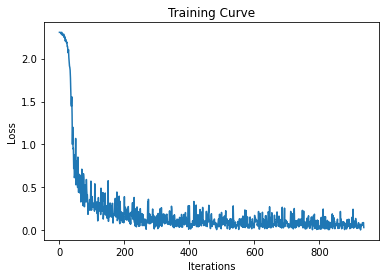

In [85]:
model = SimpleCNN()

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), 0.01, momentum=0.9, weight_decay=5e-4)

train(0)

The first thing that you might notice is that the loss is a bit noisy. Some people choose to plot a running average of the loss to remove some of the noise.

You can try how the training curve changes aas we change the batch size and the learning rate.


# 6. Visualizing Filters 

In this section, we will look into the practical aspects and code for visualizing filters. 

We first create a model_weights list to save the weights of all the convolutional layers.

Next, we are getting all the model children as list and sorting them in the model_children list. This will allow us to easily access hidden layers.

In [86]:
model_weights = [] # We will save the conv layer weights in this list 

# Get all the model children as list
model_children = list(model.children())

In [91]:
model_children

[Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1)),
 Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1)),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Linear(in_features=320, out_features=200, bias=True),
 Linear(in_features=200, out_features=10, bias=True),
 ReLU()]

We will have to traverse through all these nestings to retrieve the convolutional layers and their weights.

The following code shows how to retrieve all the convolutional layers and their weights.

In [95]:
# Counter to keep count of the conv layers
counter = 0

# Append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)

print(f"Total convolutional layers: {counter}")

Total convolutional layers: 2


In [94]:
model_children[0].weight

<function Parameter.count_nonzero>

For the sake of simplicity, we will only visualize the filters of the first convolutional layer.

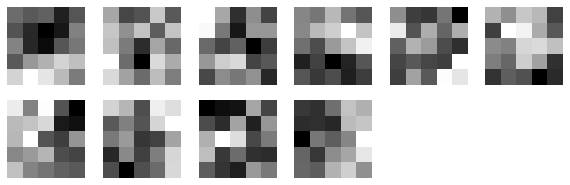

In [97]:
# Visualize the first conv layer filters
plt.figure(figsize=(10, 10))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(6, 6, i+1) # (6, 6) because in conv1 we have 5x5 filters and total of 10 (C_out)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
    plt.savefig('filter.png')
    
plt.show()

In [98]:
# ?filter.detach

# 7. Testing 
Let's define the test and visualize functions now.

In [104]:
def test():
    # model.eval()的作用是不启用 Batch Normalization 和 Dropout。
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            test_loss += criterion(outputs, targets).item() * inputs.size(0) # Sum up batch loss
            preds = outputs.max(1, keepdim=True)[1] # Get the index of the max probability
            correct += preds.eq(targets.view_as(preds)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
def visualize():
    model.eval()
    testiter = iter(test_loader)
    inputs, targets = testiter.next()

    with torch.no_grad():
        outputs = model(inputs)
        preds = outputs.max(1, keepdim=True)[1]  # 取预测概率最大的index的值为预测的数字值
        print(preds.shape)
    
    img = torchvision.utils.make_grid(inputs)
    imshow(img, 0.1307, 0.3081)
    print('GT\t:', ' '.join('%d' % targets[j].item() for j in range(len(targets))))
    print('Pred\t:', ' '.join('%d' % preds[j].item() for j in range(len(targets))))


Let's do the test and visualize the results on the model that we have just trained for 1 epoch.


Test set: Average loss: 0.0533, Accuracy: 9829/10000 (98.29%)

torch.Size([64, 1])


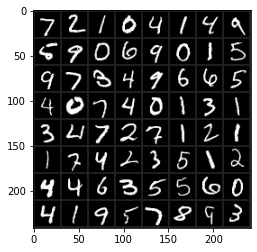

GT	: 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3
Pred	: 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 5 3


In [105]:
test()
visualize()

It seems pretty good! Let us try more epochs.

epoch 1 batch 0/937 loss 0.079
epoch 1 batch 100/937 loss 0.020
epoch 1 batch 200/937 loss 0.082
epoch 1 batch 300/937 loss 0.055
epoch 1 batch 400/937 loss 0.063
epoch 1 batch 500/937 loss 0.050
epoch 1 batch 600/937 loss 0.123
epoch 1 batch 700/937 loss 0.007
epoch 1 batch 800/937 loss 0.052
epoch 1 batch 900/937 loss 0.060
epoch 1 batch 937/937 loss 0.030


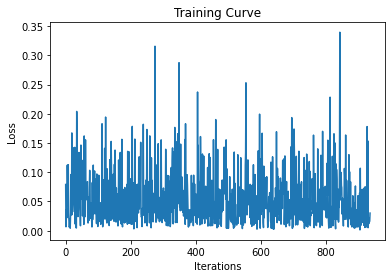


Test set: Average loss: 0.0530, Accuracy: 9842/10000 (98.42%)

epoch 2 batch 0/937 loss 0.054
epoch 2 batch 100/937 loss 0.022
epoch 2 batch 200/937 loss 0.010
epoch 2 batch 300/937 loss 0.006
epoch 2 batch 400/937 loss 0.045
epoch 2 batch 500/937 loss 0.015
epoch 2 batch 600/937 loss 0.090
epoch 2 batch 700/937 loss 0.015
epoch 2 batch 800/937 loss 0.014
epoch 2 batch 900/937 loss 0.018
epoch 2 batch 937/937 loss 0.168


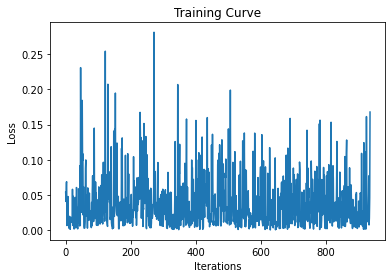


Test set: Average loss: 0.0503, Accuracy: 9841/10000 (98.41%)

epoch 3 batch 0/937 loss 0.145
epoch 3 batch 100/937 loss 0.033
epoch 3 batch 200/937 loss 0.012
epoch 3 batch 300/937 loss 0.002
epoch 3 batch 400/937 loss 0.075
epoch 3 batch 500/937 loss 0.006
epoch 3 batch 600/937 loss 0.008
epoch 3 batch 700/937 loss 0.002
epoch 3 batch 800/937 loss 0.006
epoch 3 batch 900/937 loss 0.042
epoch 3 batch 937/937 loss 0.002


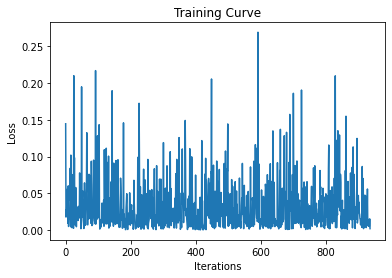


Test set: Average loss: 0.0366, Accuracy: 9885/10000 (98.85%)

torch.Size([64, 1])


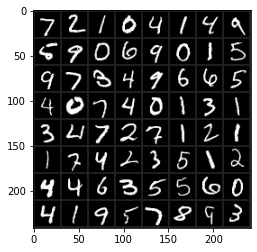

GT	: 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3
Pred	: 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 8 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3


In [106]:
for epoch in range(1, 4):
    train(epoch)
    test()

visualize()

# 8. Checkpointing 

Normally, we will train our nueral network for not just one epoch, but many.  Neural network training typically takes a long time, sometimes days, weeks, or even months. Our training code should therefore be robust to interruptions. That is, we should write our training code so that we can save and re-load weights.

It is good to checkpoint training progress by saving the neural network parameter values and training curve data to disk, once every few epochs. The frequency of checkpointing depends on many factors, but I recommend checkpointing every 10-30 minutes for large projects, and every few minutes for smaller ones.

Another advantage of checkpointing is that we now have one extra hyper-parameter we can tune for free: the epoch number! You may not wish to choose neural network parameter values at the end of training, and might opt to choose the parameter values at a different epoch of training.

One reason you might opt to do so is to prevent over-fitting. If your training loss is decreasing (as training progresses), but your validation loss stays the same, then your network is beginning to learn idiosyncrasies of the training set that do not generalize. Most often, we choose the earliest epoch with the lowest validation loss or error.

aving and loading a model in PyTorch is very easy and straight forward. It’s as simple as this:

In [111]:
chekpoint = {'model_state_dict' : model.state_dict(),
             'optimizer_state_dict' : optimizer.state_dict()}

torch.save(chekpoint, 'checkpoint.pth')

Loading is as simple as saving 
>1. Reconstruct the model from the structure saved in the checkpoint.
>1. Load the state dict to the model.
>3. Use model.eval() to freeze the parameters and enter evaluation model if you are loading the model for interference. If you wish to resuming training, call model.train() to ensure these layers are in train mode.

In [112]:
model = SimpleCNN()
optimizer = torch.optim.SGD(model.parameters(), 0.01, momentum=0.9, weight_decay=5e-4)

checkpoint = torch.load('checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

model.eval()

test()


Test set: Average loss: 2.2991, Accuracy: 901/10000 (9.01%)



# 9. What's Next?
We have sketched a simple framework for training CNNs. There are a few more functions yet to be completed.

    * Adjust the learning rate and batch size and observe the training curve
    * Plot a chart for the accuracy
    * Average the loss during each epoch when plotting a chart
    * Consider data augmentations

Please check the official Tutorials and Examples on for more details.
https://pytorch.org/tutorials/

https://github.com/pytorch/examples